# Monkeys with Typewriters

The premise is: a monkey randomly pushes the keys of a typewriter for an infinite length of time. At some point it will have typed any possible sequence of letters, including Shakespeare's collected works. Perhaps even Goethe's.


## Proof that Immortal Monkeys are Literary Geniuses

I have mixed feelings about the fact that I have arrived at this point in life. Also: aren't lobsters immortal? Can they type? If so, should they receive every Nobel Prize?

Once again, inspired by https://mast.queensu.ca/~stat455/. The key is to construct a lower bound on the probability by looking at events that happen independently and therefore make for easy calculations.

Let $M$ be the set of $m$ keys on the typewriter. Let $\{N|N\in M^n\}$ be the set of possible strings of length $n$, and let $S$ be Shakespeare's works of length $s$.  

Every $N\in\{N\}$ has $n-s+1$ consecutive overlapping substrings of length $s$. Let $A_i$ denote the event that $S$ is contained in the $i$th substring. The event $E_n$ that Shakespeare's works are in one or more of the substrings of $N$ is:

\begin{equation}
E_n = \bigcup_{i=1}^{n-s+1} A_i 
\end{equation}

The difficulty here is that the probabilities of overlapping substrings containing $S$ are not independent. However, we can select a set of up to $\lfloor \frac{n}{s}\rfloor$ non-overlapping substrings from the expection for $E_n$ and define the event $E_n'$ that none of the selected substrings contain $S$:

\begin{equation}
E_n' = \bigcup_{i=1}^{\lfloor\frac{n}{s}\rfloor} A_{1+j+i\cdot s} = \left[\bigcap_{i=1}^{\lfloor\frac{n}{s}\rfloor} A^c_{1+j+i\cdot s}\right]^c
\end{equation}

Where $j$ can be chosen arbitrarily from $j\in (0,...,n\ \mathrm{mod}\ s)$ and De Morgan's rule was used to transform unions to intersections. Now clearly $E_n' \subset E_n$ for any choice of $j$ ($j$ has the function of shifting), and therefore $p(E_n')\leq p(E_n) \leq 1$. Since the events $A_{1+j+i\cdot s}$ are independent for any $i,j$, $A^c_{1+j+i\cdot s}$ are also independent. Consequently:

\begin{equation}
p(E_n') = 1-p\left(\bigcap_{i=1}^{\lfloor\frac{n}{s}\rfloor} A^c_{1+j+i\cdot s}\right) = 1-\prod_{i=1}^{\lfloor\frac{n}{s}\rfloor}p\left(A^c_{1+j+i\cdot s}\right)
\end{equation}

The probability of a particular substring not containing S is $p\left(A^c_{i}\right) = \frac{1}{m^s} \leq 1$. Then, as $n$ approaches infinity:

\begin{equation}
\lim_{n \rightarrow \infty} p(E_n')= \lim_{n \rightarrow \infty} 1-\prod_{i=1}^{\lfloor\frac{n}{s}\rfloor}\frac{1}{m^s}=1 \leq p(E_n) \leq 1
\end{equation}


## How long it will take

What's dissatisfying about this is of course that it doesn't say how long one might have to wait until Shakespeare is typed out!

In the other notebook (```Coinflips - Expected Flips until Sequence of n Heads```) I calculated how long it take on average to flip a coin until a sequence of $n$ heads appears. The calculation is easy because there is no overlap between a wrong flip at the end of a sequence and the beginning of the sequence -- the moment tails is flipped, the process starts over. This does not necessarily have to be the case with Shakespeare. However unlikely, whenever part of the beginning of the sequence is repeated somewhere within the sequence, then there is a small chance that the monkey does not start over from the beginning if he hits a wrong key.

Example: 'to be or not to be t[hat]'

Instead of a 't', the monkey types an 'o': '[to be or not ]to be o'

At that point, despite the mistake, the monkey has a higher chance of typing out the full sequence, because it's already typed the first 7 letters correctly: 'to be o'.

Ignoring these shortcuts makes it easy to calculate an upper bound on the expected number of key strokes that it takes the monkey until it has typed Shakespeare for the first time:

\begin{equation}
\mathbb{E}[n] = \left[\frac{m-1}{m}\sum_{k=0}^{s-1}\frac{k+1}{m^{k}} + \frac{1}{m^s}s\right]\left[1-\frac{m-1}{m}\sum_{k=0}^{s-1}\frac{1}{m^{k}}\right]^{-1}
\end{equation}

Google tells me that a standard American typewriter has 44 keys and 88 characters. I will assume that hitting the right keys is enough and pretend that capslock doesn't work and isn't necessary to type Shakespeare. Then $m=44$. (Considering the problem with capslock is very interesting).

According to https://www.opensourceshakespeare.org/views/plays/plays_numwords.php there are 835,997 words in all of Shakespeare's plays. Google also tells me that the average English word has 4.7 letters (which I doubt is true for Shakespeare, but whatever). So call it 4,000,000 characters. 

Evaluating this expression will run into numerical issues within a first sentence. Simulating will be impossible. Which is to say, I have to do what I didn't do last time, and simplify it. Using the expression for the finite geometric series $\sum_{i=0}^{s-1}\frac{1}{m^k} = \frac{m}{m^s}\frac{m^s-1}{m-1}$.

Simplifying the expression "slightly":

\begin{equation}
\mathbb{E}[n] = m^s + s - 1 + \frac{m-1}{m}\sum_{i=0}^{s-1}\frac{k}{m^k}
\end{equation}

I don't know an expression for the finite sum $\sum_{i=0}^{s-1}\frac{k}{m^k}$ but below is a digression on the infinite sum. The relevant part is that the $m^s$ term easily dominates the expression, so that:

\begin{equation}
\mathbb{E}[n] \approx m^s = e^{s \ln m} \approx e^{15,136,758}
\end{equation}

Fortunately that's just an upper bound!

(If you are worried that the sum might blow up into something huge, keep reading... I found an expression for the infinite sum, which must be larger than the finite sum, and the values are pretty small.)


### Digression below:

An expression for the infinite sum $\sum_{i=0}^{\infty}\frac{k}{m^k}$ can be found thanks to this monster from Gradsteyn and Rhyzik (http://fisica.ciens.ucv.ve/~svincenz/TISPISGIMR.pdf), a book that was introduced to me by the same professor who had me up all night coding in FORTRAN.

<img src="img/gradshteyn01.png" style="width: 700px">

In G&R, the asterisk denotes a new result. Fancy. You noticed correctly that I was too lazy to type that out. In that expression, replace $b=m$ and $a=1$. Then:

\begin{equation}
\sum_{i=0}^{\infty}\frac{k}{m^k} = 0 + \sum_{i=1}^{\infty}\frac{k}{m^k} = \frac{1}{(m-1)^2} 
\end{equation}

But that can't be right! For example, if $m=2$, then $\sum_{i=0}^{\infty}\frac{k}{m^k} = \frac{1}{2} + \frac{2}{4} + \frac{3}{8} + ... \geq 1$, but $\frac{1}{(2-1)^2} = 1$.

Days later, I receive my nerd oscar. Dream big, everybody:

<img src="img/gradshteyn02.png" style="width: 700px">

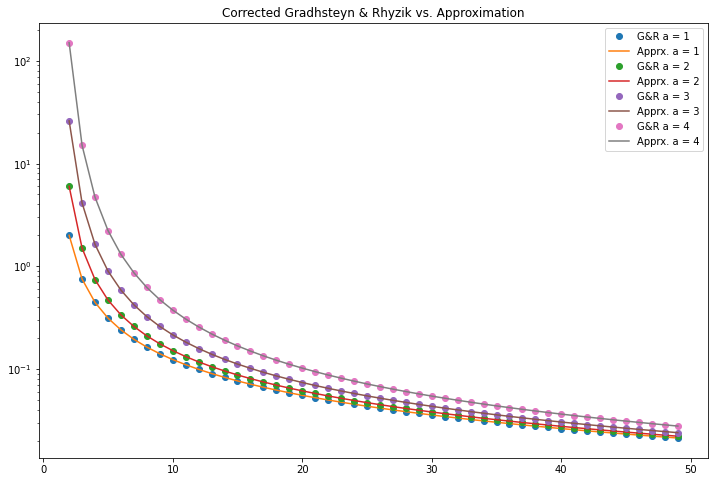

In [8]:
import numpy as np
import matplotlib.pyplot as plt


def factorial(x):
    if x == 0:
        return 1
    else:
        res = 1
        for i in range(1,x+1):
            res *= i
        return res



def GnR(a,b):
    """
    Corrected Gradshteyn & Rhyzik 
    """
    prefactor = b**a/(b-1)**(a+1)
    
    def jsum(i):
        return np.sum(
            [(-1)**j * factorial(a+1) * (i - j)**a /(factorial(j) * factorial(a+1-j)) for j in range(0,i+1)]
        )
    
    def isum(a):
        return np.sum([(1/b**(a-i))*jsum(i) for i in range(1,a+1)])
    
    return prefactor*isum(a)


def series(a,b,N=100):
    """
    approximate the series using the first N terms
    """
    s = 0
    for i in range(N+1):
        s += (i**a)/(b**i)
    return s



mm = list(range(2,50))

plt.figure(figsize=(12,8))


aa = [1,2,3,4]
for a in aa:
    plt.semilogy(mm,[GnR(a,m) for m in mm],'.',markersize=12)
    plt.semilogy(mm,[series(a,m) for m in mm],'-')
    
plt.legend(np.hstack([['G&R a = %i' % a,'Apprx. a = %i' % a] for a in aa]))
    
_ = plt.title('Corrected Gradhsteyn & Rhyzik vs. Approximation')